In [2]:
import numpy as np
import matplotlib.pyplot as  plt
import pandas as pd
import scipy.stats as ss
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.formula.api import ols

In [3]:
meshPoints = np.linspace(-1, 1, 500)

In [4]:
y = [np.sin(2*np.pi*i) for i in meshPoints]

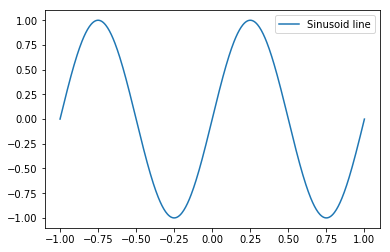

In [5]:
plt.plot(meshPoints, y, label="Sinusoid line")
plt.legend()
plt.show()

In [29]:
A=np.array([[17, 24, 1, 8, 15],
[23, 5, 7, 14, 16],
[ 4, 6, 13, 20, 22],
[10, 12, 19, 21, 3],
[11, 18, 25, 2, 9]])

In [30]:
print("縦:", np.sum(A, axis=0))
print("横:", np.sum(A, axis=1))
print("対角", np.sum(np.diag(A)))
print("対角逆", np.sum(np.diag(A[::-1])))

縦: [65 65 65 65 65]
横: [65 65 65 65 65]
対角 65
対角逆 65


In [8]:
data = np.loadtxt("data/prob2.txt", delimiter=",")

In [9]:
df = pd.DataFrame(data).T.rename(columns={0:"A1", 1:"A2"})
df

,A1,A2
0,0.22,-5.13
1,-0.87,-2.19
2,-2.39,-2.43
3,-1.79,-3.83
4,0.37,0.50
5,-1.54,-3.25
6,1.28,4.32
7,-0.31,1.63
8,-0.74,5.18
9,1.72,-0.43


0.22


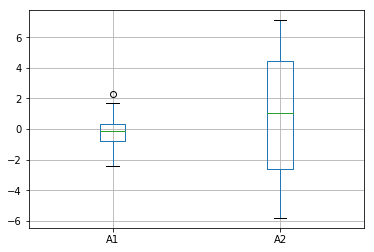

In [21]:
#fig = plt.figure()
#ax = fig.add_plot(111)
#plt.boxplot([df["A1"], df["A2"]])
#plt.boxplot(df["A2"])
box=df.boxplot()
print(df.sort_values('A1', ascending=True).A1[0])

In [27]:
some = df.sort_values('A1', ascending=True).A1
np.sort(np.asarray(some))[-1]

2.3

In [11]:
height = np.array([125,135,145,155,165,175,185])
freq = np.array([2,5,25,10,8,4,1])
r = freq/np.sum(freq)
mean = np.sum(height*freq)/np.sum(freq)
print("平均:", mean)
print("標準偏差:",np.sqrt(np.sum([(mean-height[i])**2*r[i] for i in range(0,len(freq))])))

平均: 151.0
標準偏差: 12.591483413222388


In [12]:
print(ss.norm.pdf(x=(549-5)/2, loc=5, scale=2))
print(ss.norm.cdf(549, loc=5, scale=np.sqrt(4)))

0.0
1.0


In [13]:
x = ss.norm.rvs(loc=5, scale=2, size=100)
#ss.zscore(x)
x

array([ 5.69774982,  6.11082238,  7.95970178,  4.24667411,  2.59952712,
        5.29388341,  7.3961536 ,  4.9403679 ,  7.09403045,  7.86740955,
        2.50343504,  6.15712721,  4.51130475,  3.08371284,  3.3516285 ,
        4.83038117,  9.24530882,  4.36040147,  5.03494008,  1.04670649,
        6.40038605,  6.37951831,  4.97310011,  4.8385485 ,  6.80780198,
        4.49668437,  6.99074756,  4.48849506,  8.3906944 ,  2.77295497,
        1.55640312,  1.73658684,  5.59616597,  2.22917481,  6.98731573,
        3.02877094,  7.75407219,  6.62119555,  2.37228029,  8.3356753 ,
        4.11979328, -0.03877078,  7.11402624,  4.17682759,  7.72771895,
        1.97250701,  8.82245505,  4.5299467 ,  3.47136729,  7.9527848 ,
        6.72561222,  3.18652753,  4.98824455,  1.85086189,  4.55581153,
        6.4760499 ,  6.75657455,  8.10225141,  5.16532093,  1.23090796,
        2.70891401,  5.29510146,  6.08795507,  2.03472371,  9.32761796,
        8.42088496,  5.44668582,  2.91936883,  4.92917311,  6.42

In [14]:
data = np.loadtxt("data/prob6.txt", delimiter="\t", skiprows=1)

In [15]:
data

array([[42.1, 42.7],
       [41. , 43.6],
       [41.3, 43.8],
       [41.8, 43.3],
       [42.4, 42.5],
       [42.8, 43.5],
       [43.2, 43.1],
       [42.3, 41.7],
       [41.8, 44. ],
       [42.7, 44.1]])

In [16]:
ss.ttest_ind(data[:,0],data[:,1])

Ttest_indResult(statistic=-3.3972307061176026, pvalue=0.0032111425007745158)

In [17]:
data = np.loadtxt("data/prob7.txt", delimiter="\t", skiprows=1)

In [18]:
A = np.array(data[:,0])
B = np.array(data[:,1])
C = np.array(data[:,2])


data_arr = np.hstack((A,B,C))
ind_arr = np.reoeat(list("ABC"), len(A))
print(pairwise_tukeyhsd(data_arr, ind_arr))

AttributeError: module 'numpy' has no attribute 'reoeat'

In [ ]:
'''A = [14, 15, 14, 16, 15, 17, 17]
B = [17, 16, 17, 16, 15, 18, 19, 15]
C = [18, 19, 20, 19, 17, 17]
D = [20, 21, 19, 20, 19, 22, 20]
E = [19, 20, 19, 17, 17, 17, 18]
'''

A = np.array(data[:,0])
B = np.array(data[:,1])
C = np.array(data[:,2])


def tukey_hsd( ind, *args ):
    data_arr = np.hstack( args )
    ind_arr = np.array([])
    for x in range(len(args)):
      ind_arr = np.append(ind_arr, np.repeat(ind[x], len(args[x])))
    print(pairwise_tukeyhsd(data_arr,ind_arr))

#tukey_hsd(list('ABC') , A,B,C) # 第1引数:名称のリスト, 第2引数以降: データ
if __name__ == "__main__":
    tukey_hsd(list("ABC"), A, B, C)

In [ ]:
print("----------------")
print("ANOVA table:")

# one-way anova by anova_lm()
aov_table = sm.stats.anova_lm(res, typ=2)

# aov_tableはpandasのdataframeオブジェクトです・
print("----------------")
print(aov_table)
print("----------------")
# F値の取得、 access F-statistic
print("F値：", aov_table.at['group','F'])
# F値の取得、 access F-statistic
print("p値：", aov_table.at['group','PR(>F)'])
# グループ間の自由度
print("グループ間の自由度:",aov_table.at['group','df'])